In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import scale

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['percentage'])
print(missing_data.head(5))

             percentage
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603


In [4]:
drops1 = ['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley', 'LotFrontage']

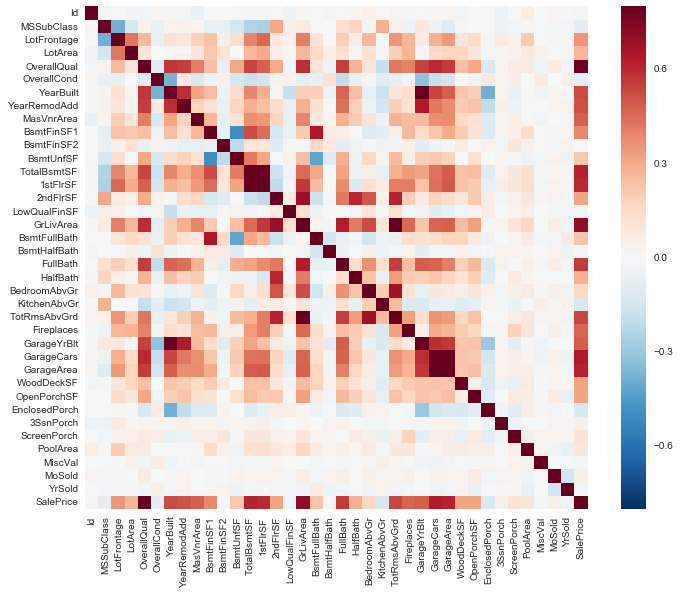

In [5]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [6]:
drops1 += ['TotalBsmtSF', 'GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'KitchenAbvGr']
train_df = train_df.drop(drops1, axis=1)
test_df = test_df.drop(drops1, axis=1)

# Analysis of pertinency of other parameters

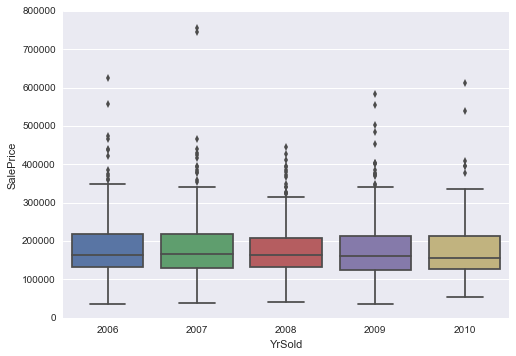

In [7]:
sns.boxplot(x="YrSold", y="SalePrice", data=train_df);

Conserver l'année semble pertinent car on remarque que l'apport d'informations peut-être important sur le prix des valeurs extrêmes (en 2007, 2008 notamment)

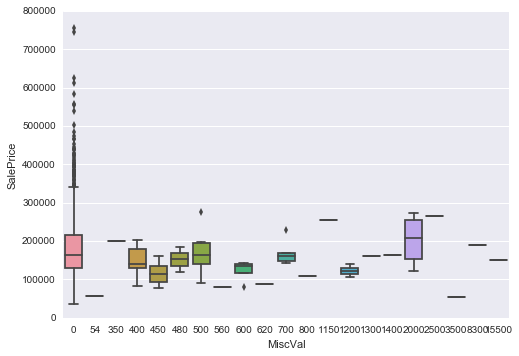

In [8]:
sns.boxplot(x="MiscVal", y="SalePrice", data=train_df);

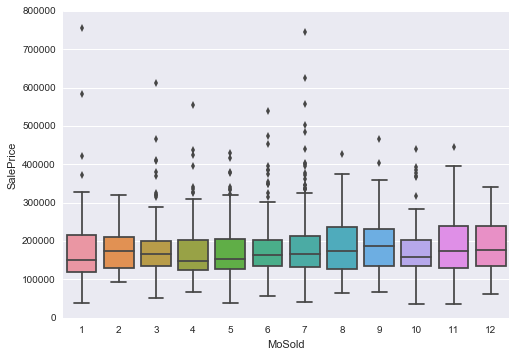

In [9]:
sns.boxplot(x="MoSold", y="SalePrice", data=train_df)

In [10]:
drops2 = ['MiscVal', 'MoSold']

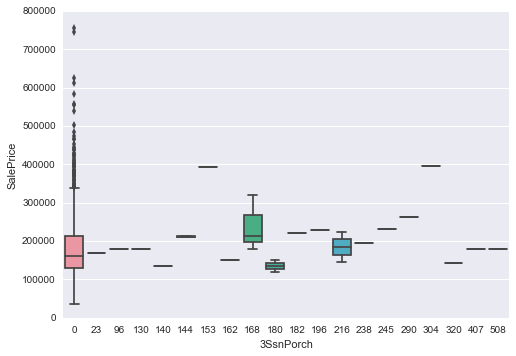

In [11]:
sns.boxplot(x="3SsnPorch", y="SalePrice", data=train_df)

On s'évite la visualisation pour les autres données vraiment peu corrélées

In [12]:
drops2 += ['3SsnPorch', 'BsmtHalfBath', 'BsmtFinSF2', 'LowQualFinSF']

In [13]:
train_df = train_df.drop(drops2, axis=1)
test_df = test_df.drop(drops2, axis=1)

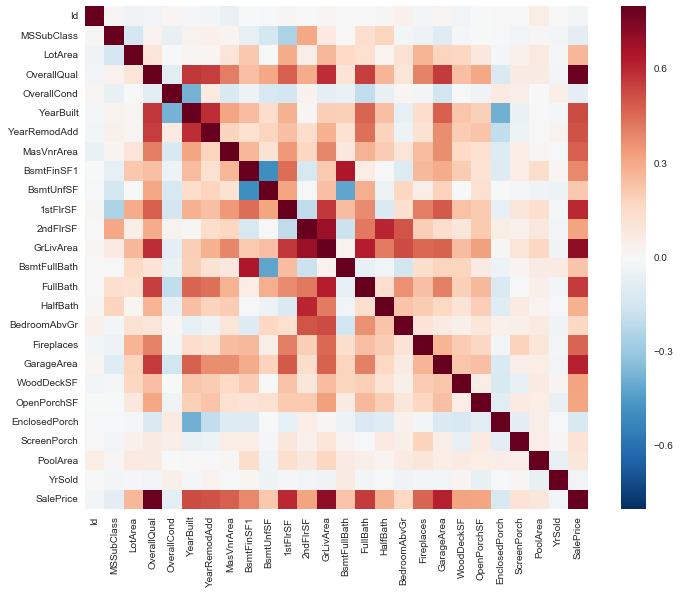

In [14]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
train_df = train_df.fillna(train_df.mean())

In [16]:
train_df = shuffle(train_df)
#X = train_df.drop(['Id', 'SalePrice'], axis=1)
X1 = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

#X_final = test_df.drop(['Id'], axis=1)
X_final1 = test_df.copy()

num = len(X1)
df = pd.concat((X1, X_final1))
df = df.fillna(df.mode().iloc[0])
df = pd.get_dummies(df)
 
X = df[:num]
X_final = df[num:]

X = X.drop('Id', axis=1)
Ids_final = X_final['Id']
X_final = X_final.drop('Id', axis=1)


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [18]:
X_valid.head(1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
946,80,8163,5,6,1959,1959,128.0,748.0,102.0,1144,...,0,0,0,1,0,0,0,0,1,0


In [19]:
# sizes = np.linspace(100, 300, num=10)
# scores = []
# for size in sizes:
#     clf = RandomForestRegressor(n_estimators=int(size), max_features='log2')
#     clf.fit(X_train, y_train)
#     print(clf.score(X_valid, y_valid))
#     scores.append(clf.score(X_valid, y_valid))
# plt.plot(sizes, scores)

In [39]:
clf = GradientBoostingRegressor(learning_rate=0.15, n_estimators=2500)
clf.fit(X_train, y_train)
print(clf.score(X_valid, y_valid))

0.929904106951


On choisit ce dernier régresseur

In [40]:
clf_final = GradientBoostingRegressor(learning_rate=0.15, n_estimators=2500)
clf_final.fit(X, y)

y_final = clf_final.predict(X_final)

In [41]:
res = pd.DataFrame(Ids_final)
res['SalePrice'] = y_final
res.to_csv('submission.csv', index=False)